## Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

###### Importing the Dataset

In [5]:
df = pd.read_csv('tested.csv')

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


##### Small Deata analysis

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.shape

(418, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### There is some values like 25.5 , 35.5 like that for those values i created a function to round those values

In [10]:
def round_age(value):
    if pd.notna(value) and isinstance(value, (int, float)) and value % 1 != 0:
        return round(value)
    else:
        return value

In [11]:
# Assuming df is your DataFrame and 'age' is the column with inconsistent values
df['Age'] = df['Age'].apply(round_age)

In [12]:
# Assuming df is your DataFrame and 'Age' is the column with null values
df['Age'].fillna(0, inplace=True)  # Replace null values with 0

C:\Users\aduser\AppData\Local\Temp\ipykernel_12328\1140893027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(0, inplace=True)  # Replace null values with 0


In [13]:
# Find the most common number excluding zeros
most_common_age = df[df['Age'] != 0]['Age'].mode().iloc[0]
most_common_age

21.0

In [14]:
# Replace zeros with the most common number
df['Age'].replace(0, most_common_age, inplace=True)

C:\Users\aduser\AppData\Local\Temp\ipykernel_12328\3157566731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, most_common_age, inplace=True)


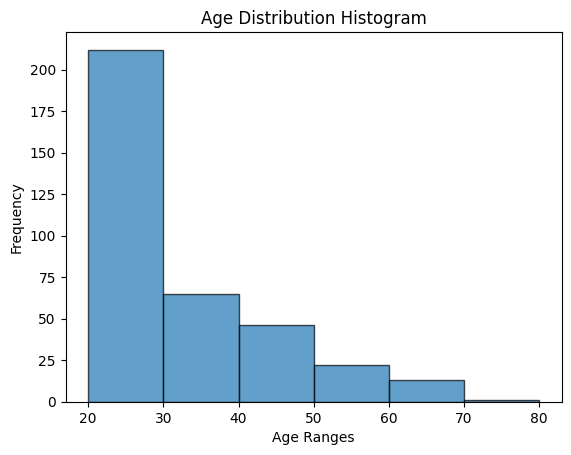

In [34]:
bins = [20,30,40,50,60,70,80]

# Create histogram
plt.hist(df['Age'], bins=bins, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Age Ranges')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

# Show the plot
plt.show()

In [15]:
# why i did this was when directly we are going to replace the common value (most are null) so it replaced with nulls. so i replaced null with 0 and after that
# replaced it with the most common age. 21

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.0,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Sex Column

In [17]:
# Sex coulm
# Assuming df is your DataFrame and 'sex' is the column with 'male' and 'female' values
sex_mapping = {'male': 1, 'female': 0}

In [18]:
df['Sex'] = df['Sex'].map(sex_mapping)

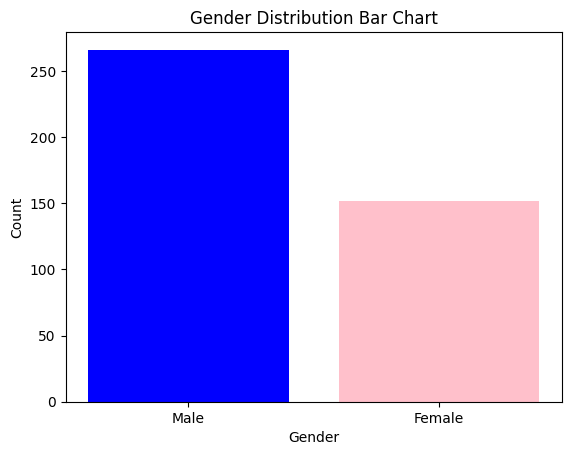

In [36]:
# Count the occurrences of each gender
gender_counts = df['Sex'].value_counts()

# Bar chart
labels = gender_counts.index.map({1: 'Male', 0: 'Female'})
counts = gender_counts.values

plt.bar(labels, counts, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution Bar Chart')

# Show the plot
plt.show()

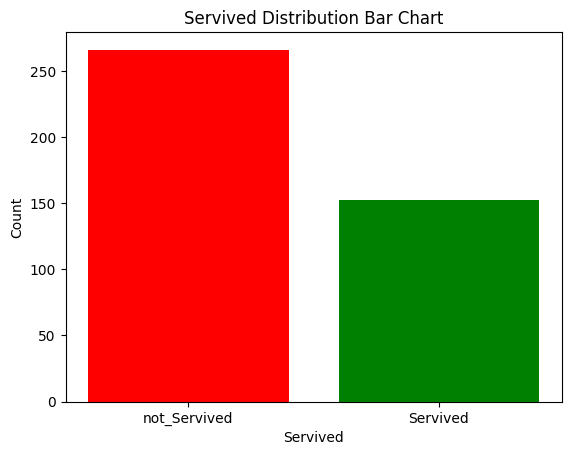

In [38]:
#Servived count

# Count the occurrences of each gender
Servived_counts = df['Survived'].value_counts()

# Bar chart
labels = Servived_counts.index.map({1: 'Servived', 0: 'not_Servived'})
counts = Servived_counts.values

plt.bar(labels, counts, color=['red', 'green'])

# Add labels and title
plt.xlabel('Servived')
plt.ylabel('Count')
plt.title('Servived Distribution Bar Chart')

# Show the plot
plt.show()

### Fare Column

In [19]:
# Assuming df is your DataFrame and 'Age' is the column with null values
df['Fare'].fillna(0, inplace=True)

C:\Users\aduser\AppData\Local\Temp\ipykernel_12328\299658383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(0, inplace=True)


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### Embarked column

In [21]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [22]:
Embarked_mapping = {'S': 1, 'C': 0, 'Q': 2}

In [23]:
df['Embarked'] = df['Embarked'].map(Embarked_mapping)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.0,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,21.0,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,0,3,"Ware, Mr. Frederick",1,21.0,0,0,359309,8.0500,NaN,1


## Lets Drop the unnessary Columns

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
# PassengerId,Name, Cabin,Ticket,Fare Drop

df = df.drop(['PassengerId','Name','Cabin','Ticket','Fare'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34.0,0,0,2
1,1,3,0,47.0,1,0,1
2,0,2,1,62.0,0,0,2
3,0,3,1,27.0,0,0,1
4,1,3,0,22.0,1,1,1
...,...,...,...,...,...,...,...
413,0,3,1,21.0,0,0,1
414,1,1,0,39.0,0,0,0
415,0,3,1,38.0,0,0,1
416,0,3,1,21.0,0,0,1


#### Model Training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
X = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [30]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [31]:
# Function to train, predict, and evaluate models
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Return the trained model and accuracy
    return model, accuracy

In [32]:
# Iterate through models and print accuracy
for name, model in models.items():
    trained_model, accuracy = train_predict_evaluate(model, X_train, y_train, X_test, y_test)
    print(f"Accuracy for {name}: {accuracy:.2f}")

Accuracy for Logistic Regression: 1.00
Accuracy for Decision Tree: 1.00
Accuracy for Random Forest: 1.00
Accuracy for SVM: 0.54
Accuracy for K-Nearest Neighbors: 0.83
Accuracy for Naive Bayes: 1.00
